In [12]:
import scipy as sps
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import multiprocessing as mp
palette = sns.color_palette("Paired")
size = 8
nsample = 10000

In [9]:
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

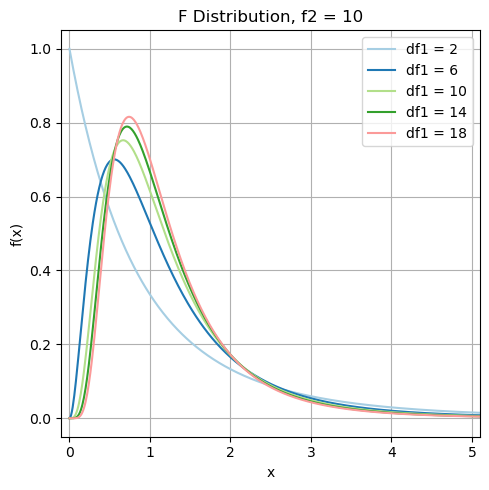

In [11]:
# visualizing the F distribution

ax_size = 5
f2 = 10

f1 = np.arange(2, 22, 4)

x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(ax_size, ax_size))
for i in range(f1.size):
    ax.plot(x, sps.stats.f.pdf(x, f1[i], f2), color=palette[i], label=f'df1 = {f1[i]}')

ax.grid(True)
ax.set_xbound(-0.1, 5.1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('F Distribution, f2 = 10')

ax.legend()
plt.tight_layout()
plt.show()

## Simulation

In [28]:
# simulation 

f1 = 14
f2 = 10

n_simulations = 1000000
n_process = 20

def simulate_and_estimate_sample_variance_ratio(f1=f1, f2=f2, mu=0, sigma1=1, sigma2=1):
    x1 = sps.stats.norm.rvs(loc=mu, scale=sigma1, size=(f1 + 1))
    x2 = sps.stats.norm.rvs(loc=mu, scale=sigma2, size=(f2 + 1))
    return np.var(x1, ddof=1) / np.var(x2, ddof=1)

with mp.Pool(n_process) as pool:
    
    results = pool.map(simulate_and_estimate_sample_variance_ratio, [f1] * n_simulations)

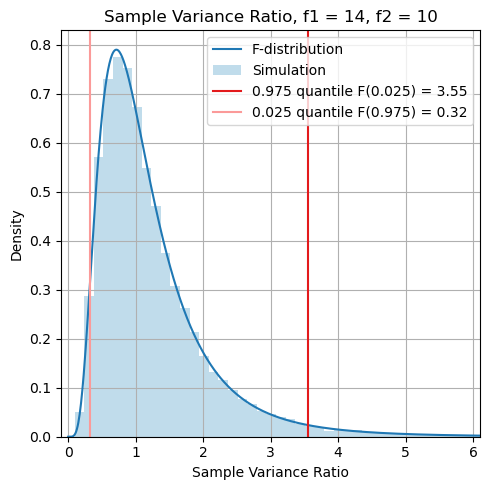

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(ax_size, ax_size))

x = np.linspace(0, 10, 1000)
ax.plot(x, sps.stats.f.pdf(x, f1, f2), color=palette[1], label='F-distribution')
ax.hist(results, bins=100, color=palette[0], alpha=0.7, density=True, label='Simulation')
ax.axvline(sps.stats.f.isf(0.025, f1, f2), color=palette[5], label=f'0.975 quantile F(0.025) = {sps.stats.f.isf(0.025, f1, f2):.2f}')
ax.axvline(sps.stats.f.isf(0.975, f1, f2), color=palette[4], label=f'0.025 quantile F(0.975) = {sps.stats.f.isf(0.975, f1, f2):.2f}')

ax.set_xlim(-0.1, 6.1)
ax.grid(True)   
ax.set_xlabel('Sample Variance Ratio')
ax.set_ylabel('Density')
ax.set_title('Sample Variance Ratio, f1 = 14, f2 = 10')
ax.legend()
plt.tight_layout()
plt.show()


## An example